In [19]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="cricket_ml"
)


C:\Users\hp\AppData\Local\Temp\ipykernel_27372\4056416768.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


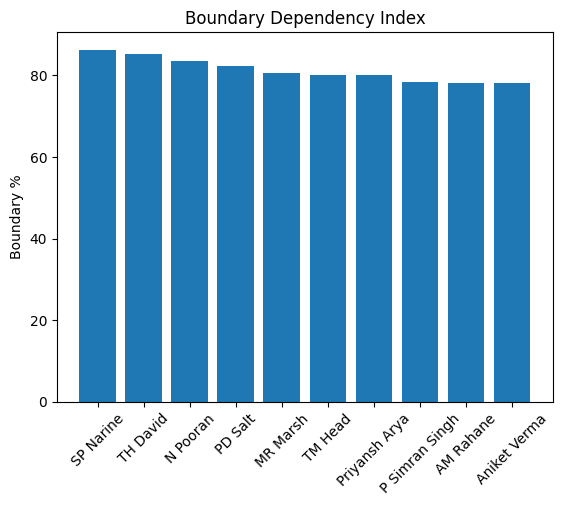

In [20]:
query = """
SELECT
    p.player_name,
    SUM(bd.runs_batter) AS total_runs,
    SUM(CASE WHEN bd.is_four = 1 THEN 4 ELSE 0 END +
        CASE WHEN bd.is_six = 1 THEN 6 ELSE 0 END) AS boundary_runs
FROM ball_delivery bd
JOIN player p ON bd.batter_id = p.player_id
GROUP BY p.player_name
HAVING total_runs >= 50
"""
df = pd.read_sql(query, conn)

df["boundary_pct"] = (df["boundary_runs"] / df["total_runs"]) * 100

df = df.sort_values("boundary_pct", ascending=False).head(10)

plt.figure()
plt.bar(df["player_name"], df["boundary_pct"])
plt.xticks(rotation=45)
plt.ylabel("Boundary %")
plt.title("Boundary Dependency Index")
plt.show()


In [21]:
query = """
SELECT
    p.player_name AS batter,
    COUNT(DISTINCT bd.match_id) AS matches_played,
    COUNT(*) AS balls_faced,
    SUM(CASE WHEN bd.is_six = 1 THEN 1 ELSE 0 END) AS sixes
FROM ball_delivery bd
JOIN player p ON bd.batter_id = p.player_id
GROUP BY p.player_name
HAVING sixes > 0
ORDER BY sixes DESC
LIMIT 10
"""
df = pd.read_sql(query, conn)

df["balls_per_six"] = df["balls_faced"] / df["sixes"]
df


C:\Users\hp\AppData\Local\Temp\ipykernel_27372\2414851816.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,batter,matches_played,balls_faced,sixes,balls_per_six
0,N Pooran,3,93,15.0,6.200000
1,SS Iyer,2,76,13.0,5.846154
2,Aniket Verma,4,67,12.0,5.583333
3,AM Rahane,4,81,10.0,8.100000
4,B Sai Sudharsan,3,124,9.0,13.777778
5,JC Buttler,3,96,9.0,10.666667
6,MR Marsh,3,73,8.0,9.125000
7,SE Rutherford,3,66,8.0,8.250000
8,SA Yadav,3,65,7.0,9.285714
9,LS Livingstone,3,54,7.0,7.714286


In [22]:
query = """
SELECT 
    p.player_name AS batter,
    COUNT(*) AS fours
FROM ball_delivery bd
JOIN player p ON bd.batter_id = p.player_id
WHERE bd.is_four = 1
GROUP BY p.player_name
ORDER BY fours DESC
LIMIT 10
"""
df = pd.read_sql(query, conn)
df


C:\Users\hp\AppData\Local\Temp\ipykernel_27372\1300005030.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,batter,fours
0,TM Head,19
1,N Pooran,17
2,B Sai Sudharsan,16
3,PD Salt,15
4,JC Buttler,14
5,RD Gaikwad,13
6,MR Marsh,13
7,N Rana,12
8,A Raghuvanshi,12
9,RM Patidar,11


C:\Users\hp\AppData\Local\Temp\ipykernel_27372\2446458700.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


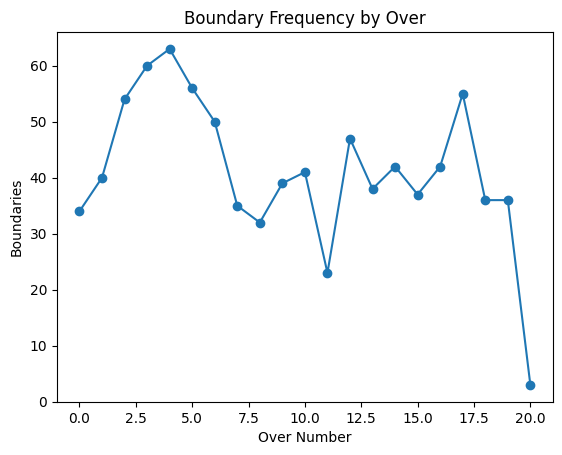

In [23]:
query = """
SELECT
    over_number,
    SUM(fours + sixes) AS boundaries
FROM over_summary
GROUP BY over_number
ORDER BY over_number
"""
df = pd.read_sql(query, conn)

plt.figure()
plt.plot(df["over_number"], df["boundaries"], marker="o")
plt.xlabel("Over Number")
plt.ylabel("Boundaries")
plt.title("Boundary Frequency by Over")
plt.show()
